In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import FinanceDataReader as dr

In [3]:
df = dr.DataReader('034730', '2021')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422
2021-01-05,248000,252000,245500,251500,478166,0.008016
2021-01-06,255500,284500,254500,273000,2378756,0.085487
2021-01-07,286000,298000,277000,296000,1930668,0.084249


- 인덱스와 로케이션으로 스칼라 검색

In [4]:
df.at['2021-01-06', 'Close']

273000

In [5]:
df.iat[2, 3]

273000

- 점수를 카테고리로 변환

In [6]:
names = ['John', 'Paul', 'Ringo']
scores = [88, 77, 66]
df = pd.DataFrame({'name': names, 'score': scores})
df

,name,score
0,John,88
1,Paul,77
2,Ringo,66


In [7]:
score_bins = [0, 60, 70, 80, 100]
letters = ['D', 'C', 'B', 'A']

In [8]:
grades = pd.cut(df.score, score_bins, labels=letters)
df['grade'] = grades
df

,name,score,grade
0,John,88,A
1,Paul,77,B
2,Ringo,66,C


- 최소 또는 최대값의 인덱스 포지션 반환

In [9]:
df = dr.DataReader('034730', '2021')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422
2021-01-05,248000,252000,245500,251500,478166,0.008016
2021-01-06,255500,284500,254500,273000,2378756,0.085487
2021-01-07,286000,298000,277000,296000,1930668,0.084249


In [10]:
df[['Close', 'Volume']].idxmin()

Close    2021-01-04
Volume   2021-01-05
dtype: datetime64[ns]

In [11]:
df[['Close', 'Volume']].idxmax()

Close    2021-01-07
Volume   2021-01-06
dtype: datetime64[ns]

- n개 최소값 또는 최대값 조회

In [12]:
df.nsmallest(2, 'Close')['Close']

Date
2021-01-04    249500
2021-01-05    251500
Name: Close, dtype: int64

In [13]:
df.nlargest(2, 'Close')['Close']

Date
2021-01-07    296000
2021-01-06    273000
Name: Close, dtype: int64

- 결측값 갯수

In [14]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

- 모든 컬럼이 결측값인 로를 삭제

In [15]:
df.dropna(how='all')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422
2021-01-05,248000,252000,245500,251500,478166,0.008016
2021-01-06,255500,284500,254500,273000,2378756,0.085487
2021-01-07,286000,298000,277000,296000,1930668,0.084249


- 모든 로가 결측인 컬럼 삭제

In [16]:
df.dropna(how='all', axis=1)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422
2021-01-05,248000,252000,245500,251500,478166,0.008016
2021-01-06,255500,284500,254500,273000,2378756,0.085487
2021-01-07,286000,298000,277000,296000,1930668,0.084249


- 정방향 또는 역방향 결측값 채우기

In [17]:
df['Close'].fillna(method='ffill')
df['Close'].fillna(method='bfill')

Date
2021-01-04    249500
2021-01-05    251500
2021-01-06    273000
2021-01-07    296000
Name: Close, dtype: int64

- 컬럼 평균값으로 결측 채우기

In [18]:
df['Close'].fillna(df['Close'].mean())

Date
2021-01-04    249500
2021-01-05    251500
2021-01-06    273000
2021-01-07    296000
Name: Close, dtype: int64

- 보간법 이용 결측 채우기

In [19]:
df['tt'] = np.nan
df

,Open,High,Low,Close,Volume,Change,tt
Date,,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422,NaN
2021-01-05,248000,252000,245500,251500,478166,0.008016,NaN
2021-01-06,255500,284500,254500,273000,2378756,0.085487,NaN
2021-01-07,286000,298000,277000,296000,1930668,0.084249,NaN


In [20]:
df.iat[0, 6] = 0
df.iat[2, 6] = 2
df

,Open,High,Low,Close,Volume,Change,tt
Date,,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422,0.0
2021-01-05,248000,252000,245500,251500,478166,0.008016,NaN
2021-01-06,255500,284500,254500,273000,2378756,0.085487,2.0
2021-01-07,286000,298000,277000,296000,1930668,0.084249,NaN


In [21]:
df = df.interpolate()
df

,Open,High,Low,Close,Volume,Change,tt
Date,,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422,0.0
2021-01-05,248000,252000,245500,251500,478166,0.008016,1.0
2021-01-06,255500,284500,254500,273000,2378756,0.085487,2.0
2021-01-07,286000,298000,277000,296000,1930668,0.084249,2.0


- 중복 제거시 마지막 로 남김

In [22]:
df.drop_duplicates(['tt'], keep='last')

,Open,High,Low,Close,Volume,Change,tt
Date,,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422,0.0
2021-01-05,248000,252000,245500,251500,478166,0.008016,1.0
2021-01-07,286000,298000,277000,296000,1930668,0.084249,2.0


- 데이터 대체

In [23]:
df['tt'] = df['tt'].replace([3, 1, 2], [6, 4, 5])
df['tt'] = df['tt'].replace({4: 7, 5: 8})
df

,Open,High,Low,Close,Volume,Change,tt
Date,,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422,0.0
2021-01-05,248000,252000,245500,251500,478166,0.008016,7.0
2021-01-06,255500,284500,254500,273000,2378756,0.085487,8.0
2021-01-07,286000,298000,277000,296000,1930668,0.084249,8.0


- applymap 모든 값에 함수 적용 

In [24]:
df.applymap(lambda x: x * 10)

,Open,High,Low,Close,Volume,Change,tt
Date,,,,,,,
2021-01-04,2410000,2500000,2400000,2495000,5614910,0.374220,0.0
2021-01-05,2480000,2520000,2455000,2515000,4781660,0.080160,70.0
2021-01-06,2555000,2845000,2545000,2730000,23787560,0.854871,80.0
2021-01-07,2860000,2980000,2770000,2960000,19306680,0.842491,80.0


- 로 병합

In [27]:
pd.concat([df2, df])

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-12-28,242500,243000,238500,240000,262582,-0.008264
2020-12-29,238500,241000,234000,235500,303528,-0.018750
2020-12-30,235500,241000,233500,240500,226620,0.021231
2021-01-04,241000,250000,240000,249500,561491,0.037422
2021-01-05,248000,252000,245500,251500,478166,0.008016
2021-01-06,255500,284500,254500,273000,2378756,0.085487
2021-01-07,286000,298000,277000,296000,1930668,0.084249


- 컬럼 병합

In [28]:
pd.concat([df2, df], axis=1)

,Open,High,Low,Close,Volume,Change,Open,High,Low,Close,Volume,Change
Date,,,,,,,,,,,,
2020-12-28,242500.0,243000.0,238500.0,240000.0,262582.0,-0.008264,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,238500.0,241000.0,234000.0,235500.0,303528.0,-0.018750,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30,235500.0,241000.0,233500.0,240500.0,226620.0,0.021231,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,241000.0,250000.0,240000.0,249500.0,561491.0,0.037422
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,248000.0,252000.0,245500.0,251500.0,478166.0,0.008016
2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN,255500.0,284500.0,254500.0,273000.0,2378756.0,0.085487
2021-01-07,NaN,NaN,NaN,NaN,NaN,NaN,286000.0,298000.0,277000.0,296000.0,1930668.0,0.084249


- 병합 유형

In [29]:
pd.concat([df2, df], axis=1, join='inner')

,Open,High,Low,Close,Volume,Change,Open,High,Low,Close,Volume,Change
Date,,,,,,,,,,,,


- 피버팅

In [40]:
df3 = pd.concat([df2, df])
df3

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2020-12-28,242500,243000,238500,240000,262582,-0.008264,B
2020-12-29,238500,241000,234000,235500,303528,-0.018750,B
2020-12-30,235500,241000,233500,240500,226620,0.021231,B
2021-01-04,241000,250000,240000,249500,561491,0.037422,A
2021-01-05,248000,252000,245500,251500,478166,0.008016,A
2021-01-06,255500,284500,254500,273000,2378756,0.085487,A
2021-01-07,286000,298000,277000,296000,1930668,0.084249,A


In [41]:
df3['date'] = df3.index

In [42]:
df3

,Open,High,Low,Close,Volume,Change,Code,date
Date,,,,,,,,
2020-12-28,242500,243000,238500,240000,262582,-0.008264,B,2020-12-28
2020-12-29,238500,241000,234000,235500,303528,-0.018750,B,2020-12-29
2020-12-30,235500,241000,233500,240500,226620,0.021231,B,2020-12-30
2021-01-04,241000,250000,240000,249500,561491,0.037422,A,2021-01-04
2021-01-05,248000,252000,245500,251500,478166,0.008016,A,2021-01-05
2021-01-06,255500,284500,254500,273000,2378756,0.085487,A,2021-01-06
2021-01-07,286000,298000,277000,296000,1930668,0.084249,A,2021-01-07


In [43]:
tt = df3.pivot(index='date', columns='Code', values='Close')
tt

Code,A,B
date,,
2020-12-28,NaN,240000.0
2020-12-29,NaN,235500.0
2020-12-30,NaN,240500.0
2021-01-04,249500.0,NaN
2021-01-05,251500.0,NaN
2021-01-06,273000.0,NaN
2021-01-07,296000.0,NaN


- stack() 컬럼 레이블과 값이 로 인덱스와 값으로 회전
- unstack() 로 인덱스와 값이 컬럼 레이블과 값으로 회전 

- 각 그룹의 n번째 로 반환

In [45]:
tt = df3.groupby('Code')
tt

In [48]:
tt.nth(1)

,Open,High,Low,Close,Volume,Change,date
Code,,,,,,,
A,248000,252000,245500,251500,478166,0.008016,2021-01-05
B,238500,241000,234000,235500,303528,-0.018750,2020-12-29


- 그룹별 집계 함수

In [53]:
tt.agg([np.sum, np.std])

Open                   High                    Low                \
          sum           std      sum           std      sum           std   
Code                                                                        
A     1030500  19821.600171  1084500  23896.914027  1017000  16301.840387   
B      716500   3511.884584   725000   1154.700538   706000   2753.785274   

        Close                 Volume                   Change           
          sum           std      sum            std       sum      std  
Code                                                                    
A     1070000  21775.368347  5349081  962064.969091  0.215174  0.03784  
B      716000   2753.785274   792730   38480.906140 -0.005783  0.02073

In [55]:
tt.agg({'Close': np.mean, 'Change': np.sum})

,Close,Change
Code,,
A,267500.000000,0.215174
B,238666.666667,-0.005783


In [56]:
tt['Close'].mean()

Code
A    267500.000000
B    238666.666667
Name: Close, dtype: float64

- 그룹 필터링

In [70]:
f = lambda x: x.Change.mean() < 0
df3.groupby('Code').filter(f)

,Open,High,Low,Close,Volume,Change,Code,date
Date,,,,,,,,
2020-12-28,242500,243000,238500,240000,262582,-0.008264,B,2020-12-28
2020-12-29,238500,241000,234000,235500,303528,-0.018750,B,2020-12-29
2020-12-30,235500,241000,233500,240500,226620,0.021231,B,2020-12-30


- 시계열 특정 연월 선택

In [72]:
df3['2021-01']

,Open,High,Low,Close,Volume,Change,Code,date
Date,,,,,,,,
2021-01-04,241000,250000,240000,249500,561491,0.037422,A,2021-01-04
2021-01-05,248000,252000,245500,251500,478166,0.008016,A,2021-01-05
2021-01-06,255500,284500,254500,273000,2378756,0.085487,A,2021-01-06
2021-01-07,286000,298000,277000,296000,1930668,0.084249,A,2021-01-07


- 특정 빈도의 시계열 생성  
D: 일  
W: 주  
H: 시간  
T: 분  
S: 초

In [2]:
tt = pd.Series(np.random.randn(24*60), pd.date_range('2021-01-01', '2021-01-01 23:59', freq='T'))
tt

2021-01-01 00:00:00    0.725897
2021-01-01 00:01:00    1.664140
2021-01-01 00:02:00    1.272462
2021-01-01 00:03:00   -1.812755
2021-01-01 00:04:00   -1.134270
                         ...   
2021-01-01 23:55:00   -0.709759
2021-01-01 23:56:00    1.150182
2021-01-01 23:57:00   -0.938568
2021-01-01 23:58:00    0.453549
2021-01-01 23:59:00    0.949416
Freq: T, Length: 1440, dtype: float64

- 시계열 데이터의 빈도 변환 또는 리샘플링

In [3]:
hh = tt.asfreq('H')
hh

2021-01-01 00:00:00    0.725897
2021-01-01 01:00:00   -0.250481
2021-01-01 02:00:00   -0.964233
2021-01-01 03:00:00    0.972329
2021-01-01 04:00:00   -0.952464
2021-01-01 05:00:00    1.165247
2021-01-01 06:00:00    1.745686
2021-01-01 07:00:00    0.333600
2021-01-01 08:00:00   -1.921323
2021-01-01 09:00:00    0.001718
2021-01-01 10:00:00   -0.834070
2021-01-01 11:00:00    0.407108
2021-01-01 12:00:00    0.236656
2021-01-01 13:00:00    0.096501
2021-01-01 14:00:00    0.855054
2021-01-01 15:00:00    1.213037
2021-01-01 16:00:00    1.405080
2021-01-01 17:00:00   -0.850401
2021-01-01 18:00:00    0.736314
2021-01-01 19:00:00    0.157094
2021-01-01 20:00:00   -0.144755
2021-01-01 21:00:00    0.406207
2021-01-01 22:00:00   -0.658645
2021-01-01 23:00:00   -1.299074
Freq: H, dtype: float64

In [12]:
hh = tt.resample('2T', closed='right').sum()
hh

2020-12-31 23:58:00    0.725897
2021-01-01 00:00:00    2.936602
2021-01-01 00:02:00   -2.947024
2021-01-01 00:04:00   -1.057628
2021-01-01 00:06:00    0.365350
                         ...   
2021-01-01 23:50:00    1.285669
2021-01-01 23:52:00   -2.099058
2021-01-01 23:54:00    0.440423
2021-01-01 23:56:00   -0.485019
2021-01-01 23:58:00    0.949416
Freq: 2T, Length: 721, dtype: float64

In [14]:
hh = tt.resample('5T').ohlc()
hh

,open,high,low,close
2021-01-01 00:00:00,0.725897,1.664140,-1.812755,-1.134270
2021-01-01 00:05:00,0.348279,1.138568,-1.405907,0.062146
2021-01-01 00:10:00,1.018126,1.464217,-1.069893,-1.069893
2021-01-01 00:15:00,-1.218576,0.543439,-1.218576,0.543439
2021-01-01 00:20:00,1.206867,1.751624,0.260001,1.098453
...,...,...,...,...
2021-01-01 23:35:00,0.200871,2.582442,-1.616251,-1.616251
2021-01-01 23:40:00,-0.092032,1.899034,-0.312138,0.248846
2021-01-01 23:45:00,-0.415819,0.280782,-0.555147,-0.505818
2021-01-01 23:50:00,0.663336,0.699006,-1.093785,-1.093785


- x축에 표시할 컬럼 지정

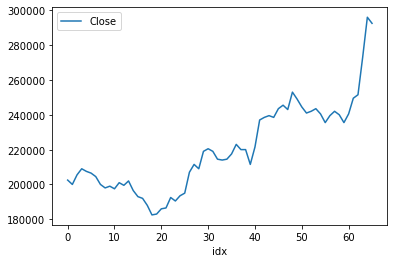

In [30]:
df['idx'] = np.arange(0, len(df))
df.plot(x='idx', y='Close')

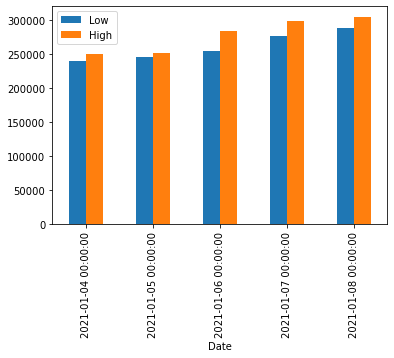

In [36]:
df2 = df['2021']
df2 = df2[['Low', 'High']]
df2.plot(kind='bar')

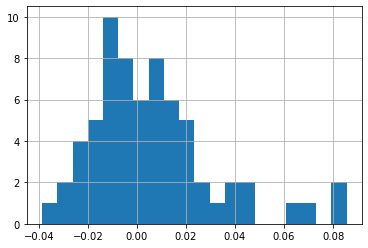

In [43]:
df['Change'].hist(bins=20)

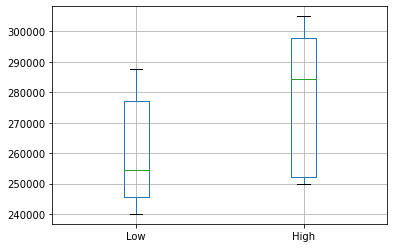

In [46]:
df2.boxplot()

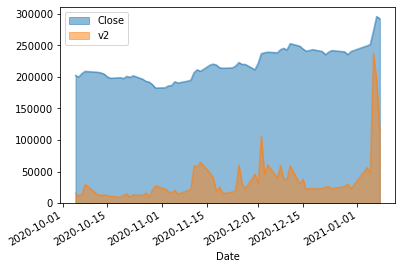

In [59]:
df['v2'] = df['Volume'] / 10
df[['Close', 'v2']].plot(kind='area', stacked=False)

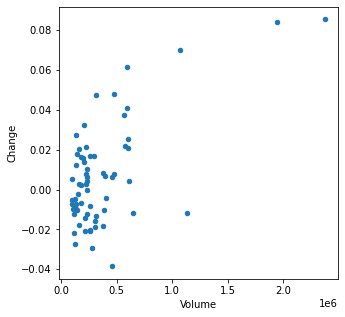

In [64]:
df.plot(kind='scatter', y='Change', x='Volume', figsize=(5, 5))

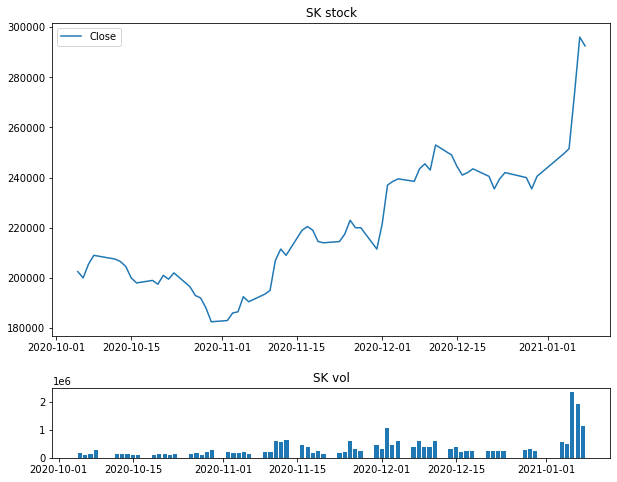

In [82]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(df['Close'], label='Close')
plt.title('SK stock')
plt.legend()

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df.index, df['Volume'])
plt.title('SK vol')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(10, 8)

In [95]:
corrs = df.corr()

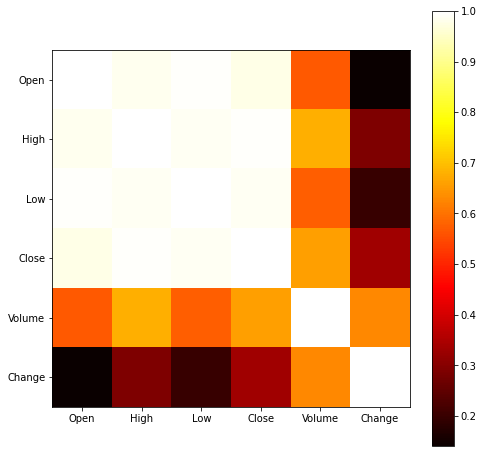

In [100]:
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)